Target:
- Mengimplementasikan 2 algoritma klasifikasi yang berbeda untuk membandingkan performa model.
- Meningkatkan akurasi dan F1-Score pada testing set minimal 92%.

**How to Run Code** 👀👀:
  - lakukan **Run All**:
    - ~3m (Full Code Active)
    - ~5s (Jika Model Selection di-Comment)
  - Comment Code / Short Code:
    - Beberapa kode, karena proses komputasi nya lama, dapat di-comment `ctrl + /`, tidak akan mengganggu kode keseluruhan karena hanya kode pengecekan, output tersedia di akhir kode 🫠
    - Kode yang dapat di-comment dimulai dengan #--Start Comment dan diakhiri dengan #--End Comment

# **1. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [ ]:
# Library Dasar
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Library untuk Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Model Klasifikasi
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression


# Evaluasi Model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# untuk Cross-Validation dan Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV, cross_val_score

# **2. Memuat Dataset dari Hasil Clustering**

Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [34]:
df = pd.read_csv('beverage_labeled.csv') # adalah 10.000 rows sample random dari dataset asli yang ada di kaggle (900k rows x 11 columns) 
df.head()

,Total_Price,Unit_Price,Quantity,Product,Discount,Cluster,Category
0,124.54,1.87,74,Hohes C Orange,0.10,0,Juices
1,31.98,1.87,18,Fritz-Kola,0.05,0,Soft Drinks
2,726.61,12.04,71,Merlot,0.15,4,Alcoholic Beverages
3,5316.13,64.91,91,Moët & Chandon,0.10,3,Alcoholic Beverages
4,6.56,1.64,4,Granini Apple,0.00,0,Juices


# **3. Data Splitting**

Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [35]:
# Pisahkan fitur (X) dan target (y)
num_df = df.select_dtypes(include=['float64', 'int64']).copy()

X = num_df.drop(columns=['Cluster'])  # Menghapus kolom Cluster (target)
y = num_df['Cluster']  # Target label

# Split data menjadi training dan testing (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

display(f"Train Data ({X_train.shape}):", X_train.head())
display(f"Test Data ({X_test.shape}):", X_test.head())

# Standarisasi fitur numerik
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

'Train Data ((8000, 4)):'

,Total_Price,Unit_Price,Quantity,Discount
2342,19.02,1.54,13,0.05
1214,32.45,2.44,14,0.05
3930,9.36,3.12,3,0.00
3385,15.90,1.59,10,0.00
2214,2.21,2.21,1,0.00


'Test Data ((2000, 4)):'

,Total_Price,Unit_Price,Quantity,Discount
489,327.57,109.19,3,0.0
5695,436.20,72.70,6,0.0
3539,3.03,1.01,3,0.0
9088,174.72,13.44,13,0.0
7037,22.35,1.49,15,0.0


# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Berikut adalah rekomendasi tahapannya.
1. Pilih algoritma klasifikasi yang sesuai, seperti Logistic Regression, Decision Tree, Random Forest, atau K-Nearest Neighbors (KNN).
2. Latih model menggunakan data latih.

In [36]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

gb = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)

nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)

svc = SVC(kernel='rbf', C=1.0, random_state=42)
svc.fit(X_train, y_train)
y_pred_svc = svc.predict(X_test)

Saya menggunakan semua algoritma klasifiasi untuk menguji Model untuk membandingkan hasil tiap model secara keseluruhan

## **b. Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Lakukan prediksi menggunakan data uji.
2. Hitung metrik evaluasi seperti Accuracy dan F1-Score (Opsional: Precision dan Recall).
3. Buat confusion matrix untuk melihat detail prediksi benar dan salah.

In [37]:
print("Accuracy Logistic Regression:", accuracy_score(y_test, y_pred_logreg))
print(classification_report(y_test, y_pred_logreg))

print("Accuracy Decision Tree:", accuracy_score(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))

print("Accuracy Random Forest:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

print("Accuracy KNN:", accuracy_score(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))

print("Accuracy Gradient Boosting:", accuracy_score(y_test, y_pred_gb))
print(classification_report(y_test, y_pred_gb))

print("Accuracy GaussianNB:", accuracy_score(y_test, y_pred_nb))
print(classification_report(y_test, y_pred_nb))

print("Accuracy SVC:", accuracy_score(y_test, y_pred_svc))
print(classification_report(y_test, y_pred_svc))

Accuracy Logistic Regression: 0.996
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1902
           1       0.92      1.00      0.96        22
           2       1.00      1.00      1.00         2
           3       1.00      1.00      1.00         7
           4       1.00      0.88      0.94        67

    accuracy                           1.00      2000
   macro avg       0.98      0.98      0.98      2000
weighted avg       1.00      1.00      1.00      2000

Accuracy Decision Tree: 0.9995
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1902
           1       0.96      1.00      0.98        22
           2       1.00      1.00      1.00         2
           3       1.00      1.00      1.00         7
           4       1.00      0.99      0.99        67

    accuracy                           1.00      2000
   macro avg       0.99      1.00      0.99      2000
weighted a

### Perbandingan Akurasi dan F1-Score Model Klasifikasi

Berikut adalah tabel perbandingan hasil akurasi dan F1-score untuk masing-masing model:

| Model                     | Akurasi  | F1-Score (Weighted Avg) |
|---------------------------|----------|-------------------------|
| Logistic Regression       | 0.9960   | 1.00                    |
| Decision Tree            | 0.9995   | 1.00                    |
| Random Forest            | 0.9995   | 1.00                    |
| K-Nearest Neighbors (KNN) | 0.9965   | 1.00                    |
| Gradient Boosting        | 0.9995   | 1.00                    |
| Gaussian Naïve Bayes     | 0.9685   | 0.97                    |
| Support Vector Machine (SVC) | 0.9975 | 1.00                    |

### **Kesimpulan**
- Model dengan Akurasi Tertinggi:
  - Decision Tree, Random Forest, dan Gradient Boosting memiliki akurasi 99.95%, menjadikannya model terbaik berdasarkan akurasi.
  - SVC (99.75%) dan Logistic Regression (99.6%) juga menunjukkan performa yang sangat baik.
- Gaussian Naïve Bayes memiliki performa terendah dengan akurasi 96.85% dan f1-score 0.97, kemungkinan karena asumsi distribusi normal pada fitur tidak terpenuhi.
- Decision Tree vs Random Forest vs Gradient Boosting:
  - Ketiga model ini memiliki performa serupa.
  - Random Forest dan Gradient Boosting cenderung lebih stabil terhadap overfitting dibanding Decision Tree.
- SVC dan KNN juga menunjukkan performa sangat baik, tetapi sedikit di bawah Random Forest dan Gradient Boosting.

Berdasarkan hasil perbandingan, Random Forest adalah pilihan terbaik sebagai model utama. Alasannya:
- Akurasi tinggi (99.95%)
- Lebih stabil dibanding Decision Tree & Gradient Boosting
- Cocok untuk dataset dengan berbagai fitur

## **c. Tuning Model Klasifikasi (Optional)**

Menggunakan Model **Random Forest**, kita akan melakukan testing berbagai konfigurasi model (Kode dikomentar sementara karena proses ~2m 57s [Silahkan buka komentar jika ingin mencobanya], jika ingin melihat output ada di akhir kode)

In [ ]:
#--Start Comment

# Dictionary untuk menyimpan hasil sebelum dan sesudah tuning
results = {}

# ==== Hyperparameter Tuning untuk Random Forest ====
rf_params = {
    'n_estimators': [50, 100, 200],
    'criterion': ['gini', 'entropy'],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Inisialisasi model Random Forest
rf = RandomForestClassifier(random_state=42)

# Grid Search dengan Cross Validation
rf_grid = GridSearchCV(rf, rf_params, cv=5, scoring='accuracy', n_jobs=-1)
rf_grid.fit(X_train, y_train)

# Model terbaik setelah tuning
best_rf = rf_grid.best_estimator_
rf_best_pred = best_rf.predict(X_test)

# Simpan hasil tuning Random Forest
results["Best Params"] = rf_grid.best_params_
results["Accuracy"] = accuracy_score(y_test, rf_best_pred)
results["Classification Report"] = classification_report(y_test, rf_best_pred)

# ==== Cetak Hasil Tuning ====
print("Best Parameters:", results["Best Params"])
print("Accuracy:", results["Accuracy"])
print("Classification Report:\n", results["Classification Report"])

# Lakukan cross-validation pada model terbaik
cv_scores = cross_val_score(best_rf, X_train, y_train, cv=5, scoring='accuracy')

# Tambahkan hasil cross-validation ke dalam dictionary hasil
results["Cross Validation Scores"] = cv_scores
results["Mean CV Score"] = cv_scores.mean()

# Cetak hasil cross-validation
print("Cross Validation Scores:", cv_scores)
print("Mean Cross Validation Score:", results["Mean CV Score"])

#--End Comment


## --- OUTPUT --- ##
# Best Parameters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
# Accuracy: 0.9995
# Classification Report:
#                precision    recall  f1-score   support

#            0       1.00      1.00      1.00      1902
#            1       0.96      1.00      0.98        22
#            2       1.00      1.00      1.00         2
#            3       1.00      1.00      1.00         7
#            4       1.00      0.99      0.99        67

#     accuracy                           1.00      2000
#    macro avg       0.99      1.00      0.99      2000
# weighted avg       1.00      1.00      1.00      2000

# Cross Validation Scores: [1.       1.       1.       1.       0.999375]
# Mean Cross Validation Score: 0.999875

## **d. Evaluasi Model Klasifikasi setelah Tuning (Optional)**

Berikut adalah rekomendasi tahapannya.
1. Gunakan model dengan hyperparameter terbaik.
2. Hitung ulang metrik evaluasi untuk melihat apakah ada peningkatan performa.

=== Evaluasi Model Default ===
Accuracy: 0.9995
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1902
           1       0.96      1.00      0.98        22
           2       1.00      1.00      1.00         2
           3       1.00      1.00      1.00         7
           4       1.00      0.99      0.99        67

    accuracy                           1.00      2000
   macro avg       0.99      1.00      0.99      2000
weighted avg       1.00      1.00      1.00      2000


=== Evaluasi Model Tuning ===
Accuracy: 0.9995
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1902
           1       0.96      1.00      0.98        22
           2       1.00      1.00      1.00         2
           3       1.00      1.00      1.00         7
           4       1.00      0.99      0.99        67

    accuracy                           1.

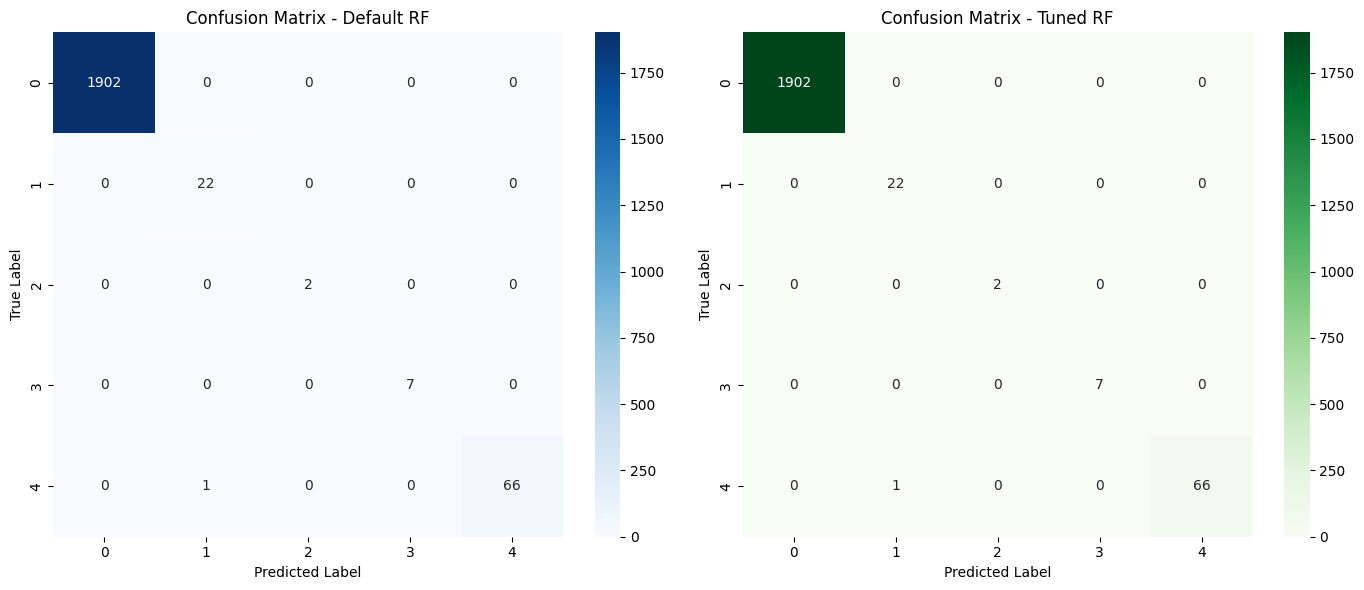

In [39]:
# Simpan hasil evaluasi model default
default_results = {
    "Accuracy": accuracy_score(y_test, y_pred_rf),
    "Classification Report": classification_report(y_test, y_pred_rf, output_dict=True),
    "Confusion Matrix": confusion_matrix(y_test, y_pred_rf)
}

# ==== 2. Model Random Forest dengan Hyperparameter Tuning ====
best_params = {
    'criterion': 'entropy',
    'max_depth': 10,
    'min_samples_leaf': 1,
    'min_samples_split': 2,
    'n_estimators': 50
}

rf_tuned = RandomForestClassifier(**best_params, random_state=42)
rf_tuned.fit(X_train, y_train)
rf_tuned_pred = rf_tuned.predict(X_test)

# Simpan hasil evaluasi model tuning
tuned_results = {
    "Accuracy": accuracy_score(y_test, rf_tuned_pred),
    "Classification Report": classification_report(y_test, rf_tuned_pred, output_dict=True),
    "Confusion Matrix": confusion_matrix(y_test, rf_tuned_pred)
}

# ==== 3. Tampilkan Hasil Evaluasi ====
print("=== Evaluasi Model Default ===")
print("Accuracy:", default_results["Accuracy"])
print("Classification Report:\n", classification_report(y_test, y_pred_rf))

print("\n=== Evaluasi Model Tuning ===")
print("Accuracy:", tuned_results["Accuracy"])
print("Classification Report:\n", classification_report(y_test, rf_tuned_pred))

# ==== 4. Visualisasi Confusion Matrix ====
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Confusion Matrix untuk Model Default
sns.heatmap(default_results["Confusion Matrix"], annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title("Confusion Matrix - Default RF")
axes[0].set_xlabel("Predicted Label")
axes[0].set_ylabel("True Label")

# Confusion Matrix untuk Model Tuning
sns.heatmap(tuned_results["Confusion Matrix"], annot=True, fmt='d', cmap='Greens', ax=axes[1])
axes[1].set_title("Confusion Matrix - Tuned RF")
axes[1].set_xlabel("Predicted Label")
axes[1].set_ylabel("True Label")

plt.tight_layout()
plt.show()

🌟 Hasil Tuning terlihat tidak memberikan perubahan sama sekali, setiap score sama persis. Kita masih akan menggunakan model awal (**y_pred_rf**)

## **e. Analisis Hasil Evaluasi Model Klasifikasi**

**e.1. Perbandingan Hasil Evaluasi Sebelum dan Setelah Tuning**

Dari hasil evaluasi model Random Forest sebelum dan setelah tuning, dapat disimpulkan bahwa akurasi tetap sama di angka 99.95%. Tidak ada perubahan signifikan pada metrik evaluasi seperti precision, recall, dan F1-score.

| Model                  | Accuracy | Precision (Avg) | Recall (Avg) | F1-score (Avg) |
|------------------------|-----------|-----------------|--------------|---------------|
| Random Forest (Default) | 0.9995    | 1.00            | 1.00         | 1.00          |
| Random Forest (Tuned)   | 0.9995    | 1.00            | 1.00         | 1.00          |
- Precision, recall, dan F1-score tidak berubah, menunjukkan bahwa model tuning tidak meningkatkan performa secara signifikan.
- Confusion matrix juga identik, menandakan bahwa tuning tidak berdampak besar pada distribusi prediksi.

**e.2. Identifikasi Kelemahan Model**
- Precision atau Recall Rendah untuk Kelas Tertentu. Dari classification report, terlihat bahwa:
  - Kelas 1 (Minoritas, hanya 22 sampel):
    - Recall 1.00 → Semua instance kelas ini berhasil diklasifikasikan dengan benar.
    - Precision 0.96 → Ada beberapa instance dari kelas lain yang salah diklasifikasikan sebagai kelas ini.
  - Kelas 4 (66 sampel):
    - Recall sedikit lebih rendah (0.99) → Masih ada satu instance yang salah diklasifikasikan.

Model masih mengalami sedikit kesalahan pada kelas minoritas (kelas 1 dan 4).

- Apakah Model Mengalami Overfitting atau Underfitting?
  - Tidak ada perubahan pada akurasi antara model sebelum dan setelah tuning, yang berarti model sebelumnya sudah sangat optimal.
  - Tidak ada tanda-tanda underfitting atau overfitting, karena skor di semua lipatan sangat tinggi, dengan hanya sedikit penurunan pada satu lipatan (0.999375).
  - Potensi overfitting tetap ada, karena model memiliki akurasi yang terlalu tinggi di data uji.
    - Jika performa menurun pada data baru, berarti overfitting terjadi.
    - Dapat diatasi dengan regularisasi atau pengurangan kompleksitas model.

**e.3. Rekomendasi Tindakan Lanjutan**
- Jika Model Sudah Cukup Baik: ✅ Gunakan model ini untuk prediksi pada data baru, tetapi tetap lakukan pemantauan untuk memastikan performanya tetap konsisten.
- Jika Ingin Meningkatkan Model. Coba algoritma lain seperti:
  - XGBoost atau LightGBM → Bisa memberikan hasil yang lebih baik dengan optimasi lebih lanjut.
  - Gunakan teknik handling data imbalance seperti:
    - SMOTE (Synthetic Minority Over-sampling Technique) untuk menambah data kelas minoritas.
    - Class weighting agar model lebih memperhatikan kelas dengan sedikit data.
  - Lakukan fine-tuning lebih lanjut dengan metode lain seperti:
    - Bayesian Optimization untuk pencarian parameter yang lebih efisien.
    - Cross-validation lebih banyak lipatan (cv=10) untuk memastikan hasil lebih stabil.